### Optimise in Python

#### In this notebook we optimise the radius of a lens in order to minimize spot size at image plane. To do so I use gradient descent within python (rather than using Zemax's optimisation).

System before optimisation looks like...

![image](../data/pics/simple_no_optimised.PNG)

In [4]:
import os 
import sys
import h5py
path = os.path.dirname(os.path.dirname(os.path.realpath("__file__")))
sys.path.insert(0,path)

import numpy as np
import matplotlib.pyplot as plt
import time

from utils.api_functions import *
from utils.opt_functions import *


%run -i "\\alfs1.physics.ox.ac.uk\al\howards\Zemax\ZOS-API Projects\PythonZOSConnection\PythonZOSConnection.py"

fast_system(TheSystem) # this speeds up the program.


Found OpticStudio at:   %sc:\program files\zemax opticstudio
Connected to OpticStudio
Serial #:  L121911


Set up Merit Function

In [5]:
#we can set up the merit function here.
MFE = TheSystem.MFE

merit = 'RMS_Spot_Size.mf'

MFE.LoadMeritFunction(path + '/data/Merits/RMS_Spot_Size.mf')

Lets try implement gradient descent. Also its important how long it takes

In [3]:
LDE = TheSystem.LDE #Initialize the Lens Data Editor.


iterations = 500
loss_array = np.zeros(iterations)
x_array = np.zeros(iterations)

learning_rate = np.ones(iterations) 
learning_rate[300:400] *= 0.5
learning_rate[400:500] *= 0.1 



x0 = 70 #initial guess for radius

set_array = np.array([[1,x0,None]]) #for element 1, change radius to x0 and dont change thickness.

set_parameter(LDE,set_array)
loss = calc_merit(MFE)

x_array[0] = x0
loss_array[0] = loss


x = 1.01 * x0 #start with small pertubation



tic = time.time()
for i in range(1,iterations):
    sys.stdout.write('\r'+("%.0f%% done" % (i/iterations * 100)))


    set_parameter(LDE,np.array([[1, x, None]]))
    loss = calc_merit(MFE)

    x_array[i] = x
    loss_array[i] = loss

    grad = calculate_grad(loss_array[i-1:i+1],x_array[i-1:i+1])
    
    x -= learning_rate[i] * grad


toc = time.time()
print(' in '+ str(np.round(toc-tic,2)) + ' seconds')

100% done in 18.28 seconds


final loss = 0.05107568838287888


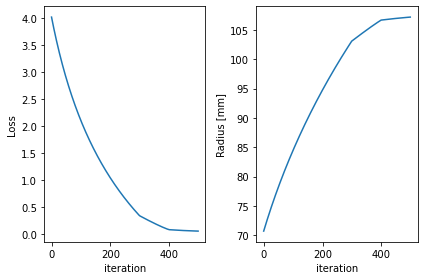

In [8]:
fig,ax = plt.subplots(1,2)

ax[0].plot(loss_array[1:]);ax[0].set_xlabel('iteration');ax[0].set_ylabel('Loss');
ax[1].plot(x_array[1:]);ax[1].set_xlabel('iteration');ax[1].set_ylabel('Radius [mm]');
plt.tight_layout()

print('final loss = ' + str(loss))

Lets look at our final results

![image](../data/pics/simple_optimised.PNG)